This notebook aims to generate illustrations for the tidal forces created by gravitatational waves

In [1]:
# Load packages
import numpy as np
#from scipy import special
#from scipy.optimize import root
import matplotlib
import matplotlib.pyplot as plt

# Use TeX
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 12})

In [2]:
# tidal field of a gravitational wave
def tidal_GW(t, x, y, hplus=1, hcross=0, omega=2*np.pi):
    Fx = omega**2*((hplus*x + hcross*y)*np.exp(-1j*omega*t)).real
    Fy = omega**2*((-hplus*y + hcross*x)*np.exp(-1j*omega*t)).real
    return np.array((Fx, Fy))

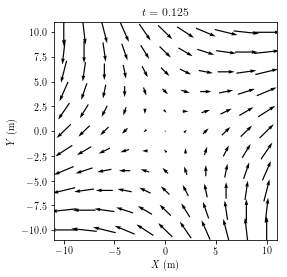

In [3]:
# an example of force field
t=1/8
x, y = np.meshgrid(np.arange(-10, 11, 2), np.arange(-10, 11, 2))

force = tidal_GW(t, x, y, hplus=0.005, hcross=1j*0.005, omega=2*np.pi)
Fx, Fy = force[0,:], force[1,:]

plt.figure(figsize=(4,4))
plt.axis([-11, 11, -11, 11])
plt.xlabel(r'$X$ (m)')
plt.ylabel(r'$Y$ (m)')
plt.title(r'$t={}$'.format(t))
plt.quiver(x, y, Fx, Fy, pivot='mid', angles='xy', scale_units='xy', scale=1);

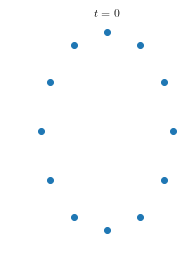

In [5]:
# displacement of a ring of particles
t=0
N = 12
pos0 = [(np.cos(theta), np.sin(theta)) 
             for theta in np.linspace(0, 2*np.pi, N, endpoint=False)]
pos0 = np.array(pos0)

omega0 = 2*np.pi
pos = np.array([np.array((x,y))
            - tidal_GW(t, x, y, hplus=0.2, hcross=0, omega=omega0)/omega0**2
          for x,y in pos0])

plt.figure(figsize=(4,4))
plt.plot(pos[:,0], pos[:,1], 'o')
plt.title(r'$t={}$'.format(t))
#plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.gca().set_aspect('equal')
plt.axis('off');

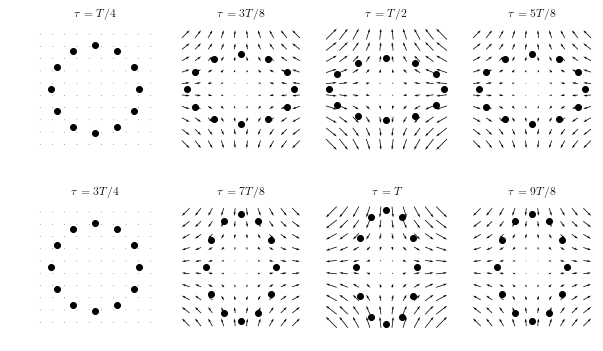

In [6]:
# Plot both the force and the particle positions at 8 different times
fig, subfigs = plt.subplots(2, 4, sharex = True, sharey = True, figsize=(10,6))
times = ['T/4', '3T/8', 'T/2', '5T/8', '3T/4', '7T/8', 'T', '9T/8']
omega0 = 2*np.pi # measure times in units of the period

for m, time in enumerate(times):
    # put the first four on the first line, and the last four
    # in the second line
    sub = subfigs[m//4,m%4]
    t = (m+2)/8
    
    # Canvas: the forces
    x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
    force = tidal_GW(t, x, y, hplus=0.005, hcross=0, omega=omega0)
    Fx, Fy = force[0,:], force[1,:]
    sub.axis([-1.1, 1.1, -1.1, 1.2])
    sub.quiver(x, y, Fx, Fy, pivot='mid', angles='xy', scale_units='xy', scale=1);
    # here we set the arrows to scale like the grid
    
    # Add the particles
    N = 12 # number of particles
    pos0 = [(np.cos(theta), np.sin(theta)) 
             for theta in np.linspace(0, 2*np.pi, N, endpoint=False)]
    pos0 = 0.8*np.array(pos0)
    # now displace them
    pos = np.array([np.array((x,y))
                    - tidal_GW(t, x, y, hplus=0.3, hcross=0, omega=omega0)/omega0**2
                      for x,y in pos0])
    sub.plot(pos[:,0], pos[:,1], 'ko')
    
    # Cosmetics
    sub.set_aspect('equal')
    sub.axis('off');
    sub.set_title(r'$\tau={}$'.format(time));
    fig.savefig('GW_plus.pdf', transparent=True, bbox_inches='tight');

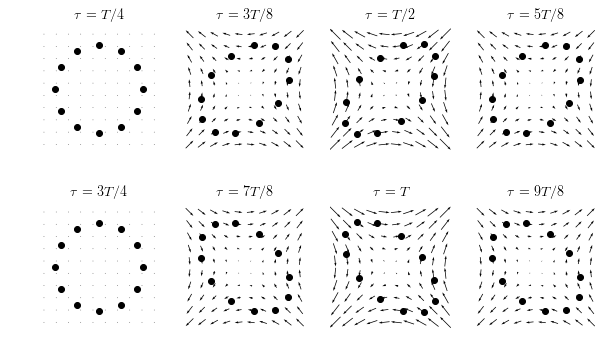

In [173]:
# Same thing with the 'cross' polarisation
fig, subfigs = plt.subplots(2, 4, sharex = True, sharey = True, figsize=(10,6))
times = ['T/4', '3T/8', 'T/2', '5T/8', '3T/4', '7T/8', 'T', '9T/8']
omega0 = 2*np.pi # measure times in units of the period

for m, time in enumerate(times):
    # put the first four on the first line, and the last four
    # in the second line
    sub = subfigs[m//4,m%4]
    t = (m+2)/8
    
    # Canvas: the forces
    x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
    force = tidal_GW(t, x, y, hplus=0, hcross=0.005, omega=omega0)
    Fx, Fy = force[0,:], force[1,:]
    sub.axis([-1.1, 1.1, -1.1, 1.2])
    sub.quiver(x, y, Fx, Fy, pivot='mid', angles='xy', scale_units='xy', scale=1);
    # here we set the arrows to scale like the grid
    
    # Add the particles
    N = 12 # number of particles
    pos0 = [(np.cos(theta), np.sin(theta)) 
             for theta in np.linspace(0, 2*np.pi, N, endpoint=False)]
    pos0 = 0.8*np.array(positions)
    # now displace them
    pos = np.array([np.array((x,y))
                    - tidal_GW(t, x, y, hplus=0, hcross=0.3, omega=omega0)/omega0**2
                      for x,y in pos0])
    sub.plot(pos[:,0], pos[:,1], 'ko')
    
    # Cosmetics
    sub.set_aspect('equal')
    sub.axis('off');
    sub.set_title(r'$\tau={}$'.format(time));
    fig.savefig('GW_cross.pdf', transparent=True, bbox_inches='tight');

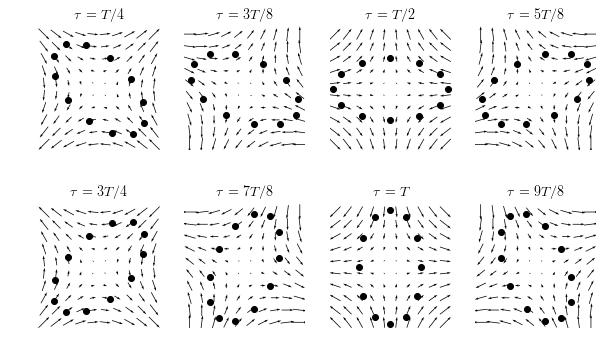

In [174]:
# Same thing with the circular polarisation
fig, subfigs = plt.subplots(2, 4, sharex = True, sharey = True, figsize=(10,6))
times = ['T/4', '3T/8', 'T/2', '5T/8', '3T/4', '7T/8', 'T', '9T/8']
omega0 = 2*np.pi # measure times in units of the period

for m, time in enumerate(times):
    # put the first four on the first line, and the last four
    # in the second line
    sub = subfigs[m//4,m%4]
    t = (m+2)/8
    
    # Canvas: the forces
    x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
    force = tidal_GW(t, x, y, hplus=0.005, hcross=0.005*1j, omega=omega0)
    Fx, Fy = force[0,:], force[1,:]
    sub.axis([-1.1, 1.1, -1.1, 1.2])
    sub.quiver(x, y, Fx, Fy, pivot='mid', angles='xy', scale_units='xy', scale=1);
    # here we set the arrows to scale like the grid
    
    # Add the particles
    N = 12 # number of particles
    pos0 = [(np.cos(theta), np.sin(theta)) 
             for theta in np.linspace(0, 2*np.pi, N, endpoint=False)]
    pos0 = 0.8*np.array(positions)
    # now displace them
    pos = np.array([np.array((x,y))
                    - tidal_GW(t, x, y, hplus=0.3, hcross=0.3*1j, omega=omega0)/omega0**2
                      for x,y in pos0])
    sub.plot(pos[:,0], pos[:,1], 'ko')
    
    # Cosmetics
    sub.set_aspect('equal')
    sub.axis('off');
    sub.set_title(r'$\tau={}$'.format(time));
    #fig.savefig('GW_circular.pdf', transparent=True, bbox_inches='tight');